In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from time import time

In [3]:
data = pd.read_csv('adsl.csv')
print(data.shape)

(96, 115)


In [4]:
X = pd.get_dummies(data[['RACE','SEX','ETHNIC','COUNTRY','AAGE','ECOGBL',
      'WEIGHTBL','HEIGHTBL','BMIBL','MFTP','HGBBL','PLATBL','WBCBL','TSSBL']])   ## chose 14 features
X.dropna(inplace = True)
print(X.shape)
X_ss = StandardScaler().fit_transform(X)

(90, 28)


In [5]:
X.head()

,AAGE,ECOGBL,WEIGHTBL,HEIGHTBL,BMIBL,HGBBL,PLATBL,WBCBL,TSSBL,RACE_OTHER,...,COUNTRY_DEU,COUNTRY_ESP,COUNTRY_FRA,COUNTRY_GBR,COUNTRY_HUN,COUNTRY_POL,COUNTRY_USA,MFTP_PMF,MFTP_POST-ET-MF,MFTP_POST-PV-MF
0,83.039014,2,79.8,176.0,25.761880,7.4,86.0,10.90,13.714286,0,...,0,0,0,0,0,0,1,1,0,0
1,80.591376,0,68.4,183.0,20.424617,10.2,187.0,120.50,46.750000,0,...,0,0,0,0,0,0,1,0,0,1
2,70.576318,0,67.6,170.0,23.391003,7.2,118.0,1.91,16.571429,0,...,0,0,0,0,0,0,1,1,0,0
3,73.423682,1,83.0,179.0,25.904310,9.5,194.0,51.29,34.000000,0,...,0,0,0,0,0,0,1,1,0,0
4,73.059548,2,68.1,161.0,26.272135,9.3,123.0,6.60,29.857143,1,...,0,0,0,0,0,0,1,0,0,1


## K-means

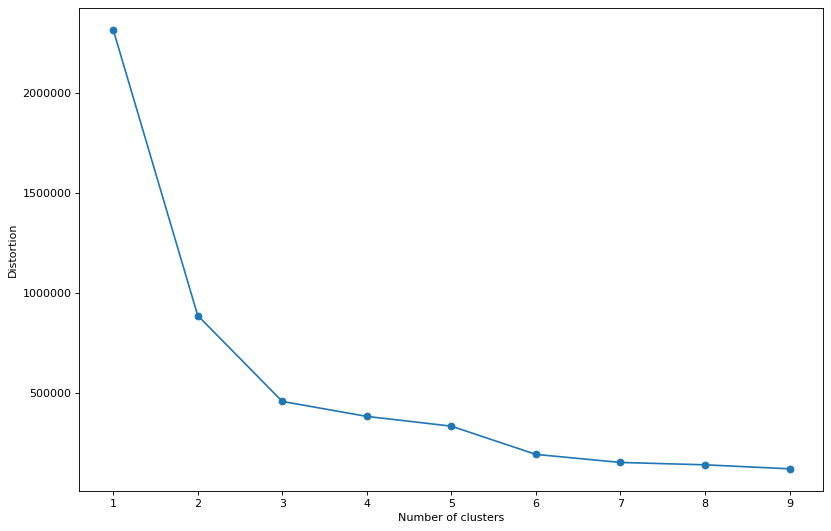

In [7]:
# calculate distortion for a range of number of clusters
distortions = []
for k in range(1, 10):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)   #Sum of squared distances of samples to their closest cluster center.

# plot
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [9]:
n_clusters = 3
X_reduced = PCA(n_components=2).fit_transform(X_ss)
km = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
y_km = km.fit_predict(X_reduced)
print(y_km)

[1 1 0 1 2 0 1 1 2 0 0 1 1 1 1 0 1 0 1 1 2 2 2 1 1 2 2 2 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0]


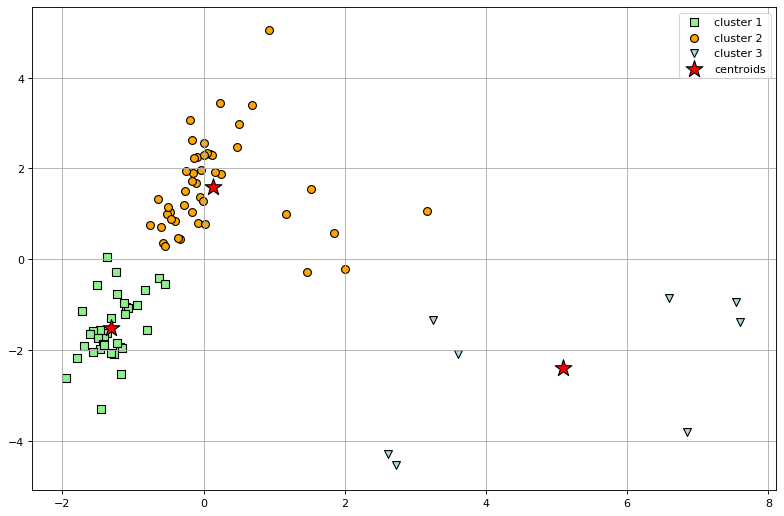

In [10]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(
    X_reduced[y_km == 0, 0], X_reduced[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_reduced[y_km == 1, 0], X_reduced[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_reduced[y_km == 2, 0], X_reduced[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Hierarchical

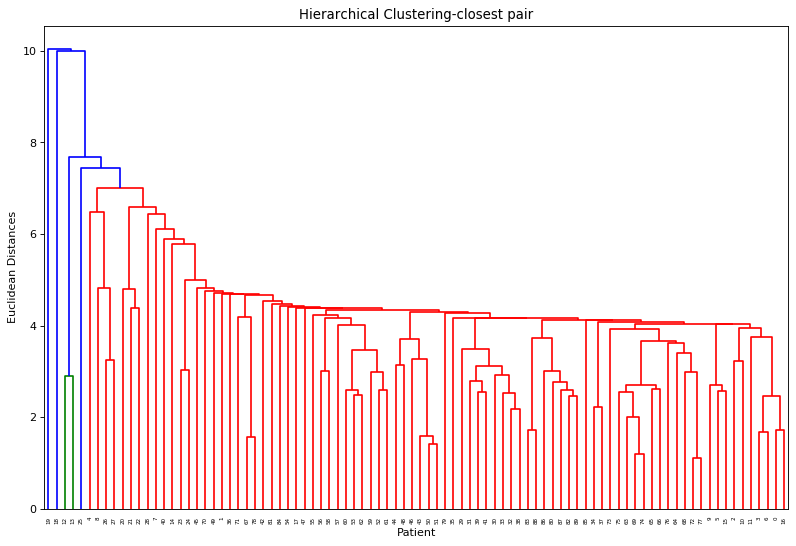

In [8]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X_ss, method = 'single'))
plt.title('Hierarchical Clustering-closest pair')
plt.xlabel('Patient')
plt.ylabel('Euclidean Distances')
plt.show()

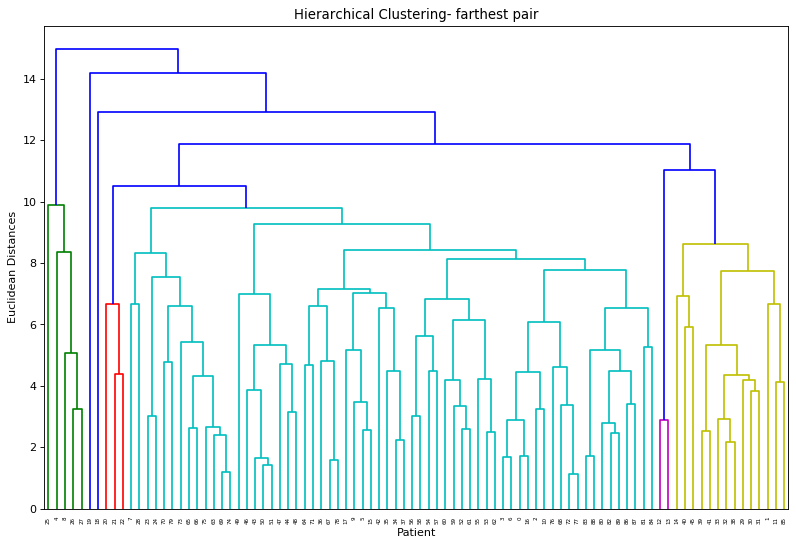

In [11]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X_ss, method = 'complete'))
plt.title('Hierarchical Clustering- farthest pair')
plt.xlabel('Patient')
plt.ylabel('Euclidean Distances')
plt.show()

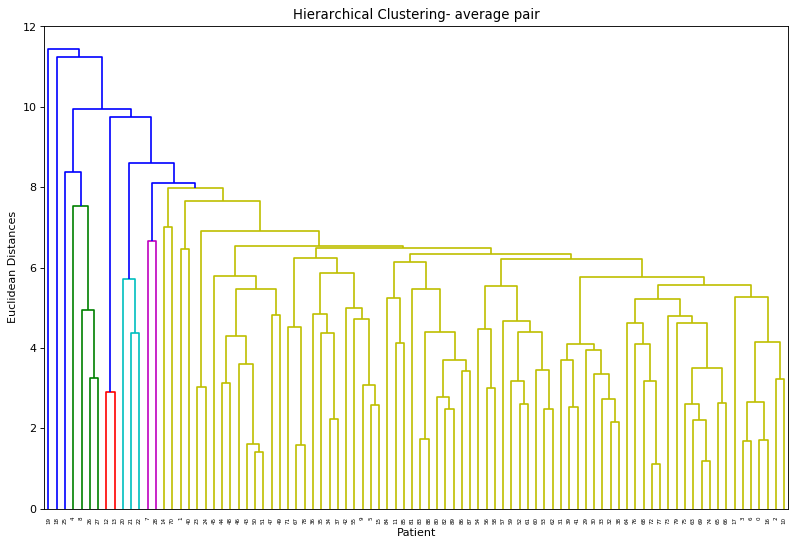

In [12]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X_ss, method = 'average'))
plt.title('Hierarchical Clustering- average pair')
plt.xlabel('Patient')
plt.ylabel('Euclidean Distances')
plt.show()

In [13]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], 'p',
                 color=plt.cm.nipy_spectral((labels[i]) / 4.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

single :	0.00s
complete :	0.00s
average :	0.00s


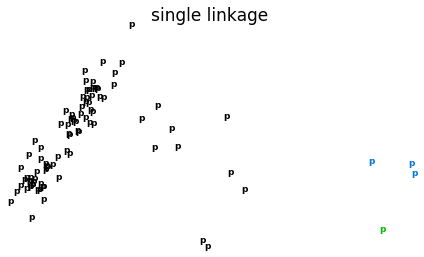

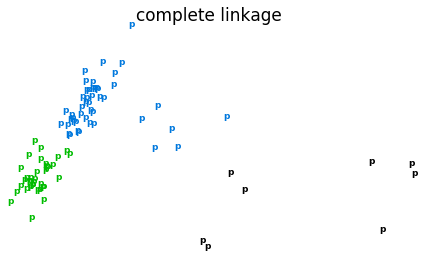

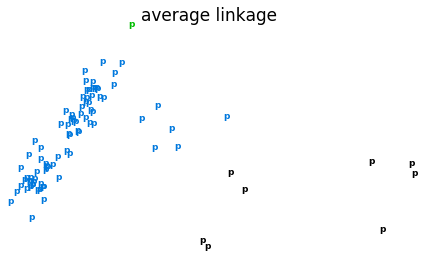

In [14]:
for linkage in ( 'single', 'complete','average'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(X_reduced)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_reduced, clustering.labels_, "%s linkage" % linkage)

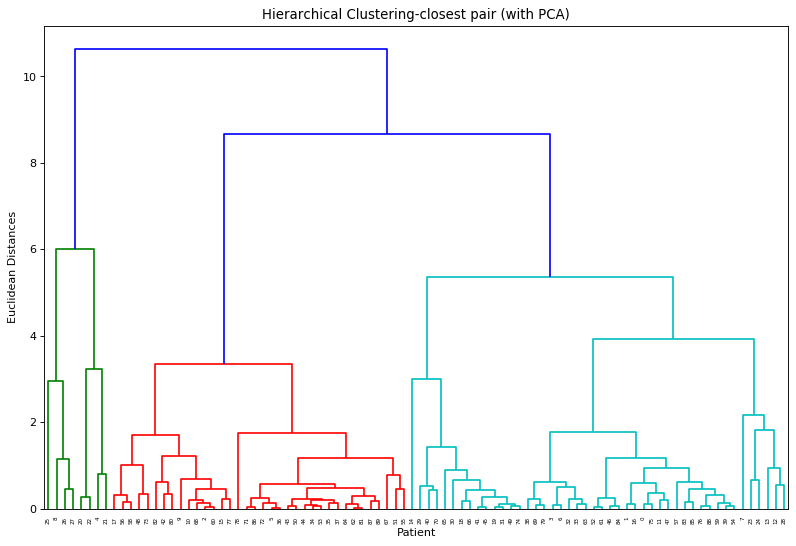

In [17]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = 'complete'))
plt.title('Hierarchical Clustering-closest pair (with PCA)')
plt.xlabel('Patient')
plt.ylabel('Euclidean Distances')
plt.show()